# The dataset contains 305 cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attributes of Data : 
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer
   (class attribute)2 = the patient died within 5 year

## Importing the dataset

In [1]:
# Importing all libraries needed for exploratory data analysis of this dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cancer_data = pd.read_csv('./InputFile/haberman.csv')

In [3]:
cancer_data.head(4)

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1


## Preparing the data

In [4]:
cancer_data.columns = ["age_of_patient","year_of_operation","pos_axil_nodes","survival_status_after_5_years"]

In [5]:
cancer_data.head(3)

,age_of_patient,year_of_operation,pos_axil_nodes,survival_status_after_5_years
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


In [6]:
cancer_data.tail(4)

,age_of_patient,year_of_operation,pos_axil_nodes,survival_status_after_5_years
301,76,67,0,1
302,77,65,3,1
303,78,65,1,2
304,83,58,2,2


In [7]:
# changeing status from 1,2 to yes and no
cancer_data.survival_status_after_5_years = cancer_data.survival_status_after_5_years.map({1:'Yes',2:'No'})

In [8]:
cancer_data.shape

(305, 4)

In [9]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
age_of_patient                   305 non-null int64
year_of_operation                305 non-null int64
pos_axil_nodes                   305 non-null int64
survival_status_after_5_years    305 non-null object
dtypes: int64(3), object(1)
memory usage: 9.6+ KB


We have no missing value in the dataset

### Our Goal is to find the relationship of survival_status and other features, so that in future we can build machine learning model using these features.
### Minimum number of records required to build a model = 2exp(number of features), which is 8 in our case and since we have 305 records, we can make a machine learning model using this data


### Descriptive Statistics of data

In [10]:
cancer_data.describe()

,age_of_patient,year_of_operation,pos_axil_nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [11]:
cancer_data['survival_status_after_5_years'].value_counts(normalize = True)

Yes    0.734426
No     0.265574
Name: survival_status_after_5_years, dtype: float64

#### Key Observations:
    1. Data is imbalanced as we expected from domain knowledge
    2. Only 25% of the patients are under the age of 44 years, meaning most of the pateints are over 44 years old.
    3. 75% of the patients has less than 4 axillary lymph nodes.
    4. 73.44 % of the patients survived after 5 years. 

## Inferential statistics

#### Univariate Analysis

*******PDF OF age_of_patient IS ********
BINSIZE --[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
PDF --[0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]
*******PDF OF year_of_operation IS ********
BINSIZE --[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
PDF --[0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]
*******PDF OF pos_axil_nodes IS ********
BINSIZE --[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
PDF --[0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]


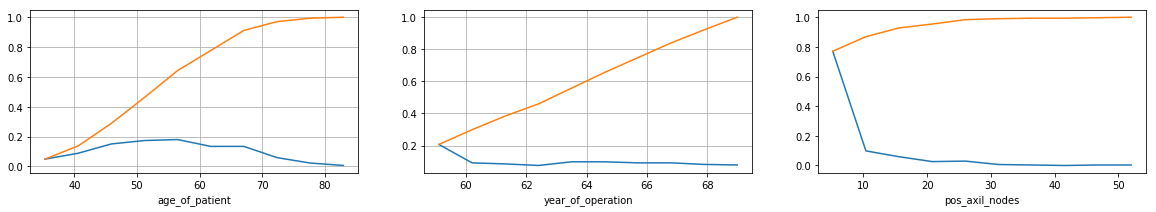

In [12]:
"""  https://www.kaggle.com/gokulkarthik/haberman-s-survival-exploratory-data-analysis/  Thanks for the good description.
* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increasein the
number of data points lying within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group
* The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.
"""
plt.figure(figsize = (20,3))
for idx,feature in enumerate(list(cancer_data.columns)[:-1]):
    counts,binsize = np.histogram(cancer_data[feature],bins = 10,density = True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    print("*******PDF OF {} IS ********".format(feature))
    print("BINSIZE --{}".format(binsize))
    print("PDF --{}".format(pdf))
    plt.grid()
    plt.subplot(1,3,idx+1)
    plt.plot(binsize[1:],pdf,binsize[1:],cdf)
    plt.xlabel(feature)
    

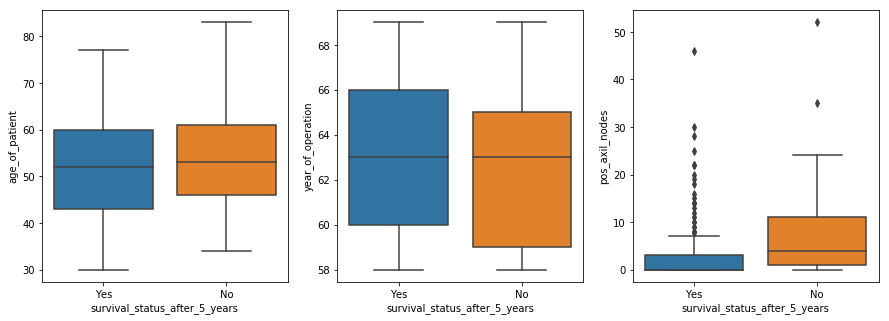

In [13]:
"""
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1
"""
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(cancer_data.columns)[:-1]):
    sns.boxplot( x='survival_status_after_5_years', y=feature, data=cancer_data, ax=axes[idx])
plt.show()  

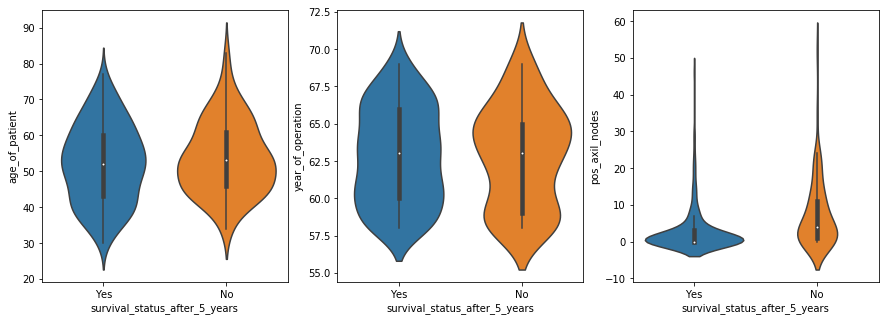

In [14]:
"""
Violin Plots are the combination of PDF and Box Plots.
"""
fig,axes = plt.subplots(1,3,figsize = (15,5))
for idx, feature in enumerate(list(cancer_data.columns[:-1])):
    sns.violinplot(x= 'survival_status_after_5_years',y=feature,data=cancer_data,ax = axes[idx])
    

### Observations:
1. Patients above age 78 could not survive after 5 years.
2. 80% of the patients have less than or equal to 5 nodes.
3. Patients treated after 1965 have the slighly higher chance of surviving after 5 years

### Multivariate Analysis

<Figure size 1080x288 with 0 Axes>

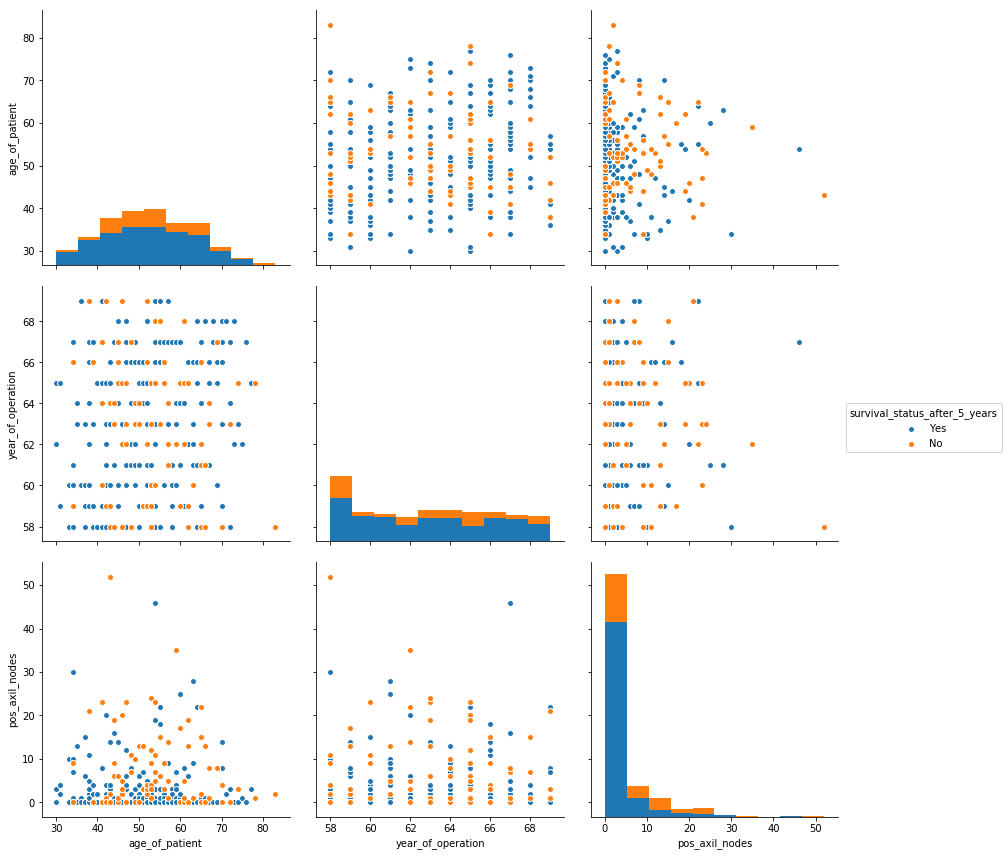

In [17]:
plt.figure(figsize = (15,4))
sns.pairplot(cancer_data,hue="survival_status_after_5_years",size = 4)

No way to classify the target variable using given features

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


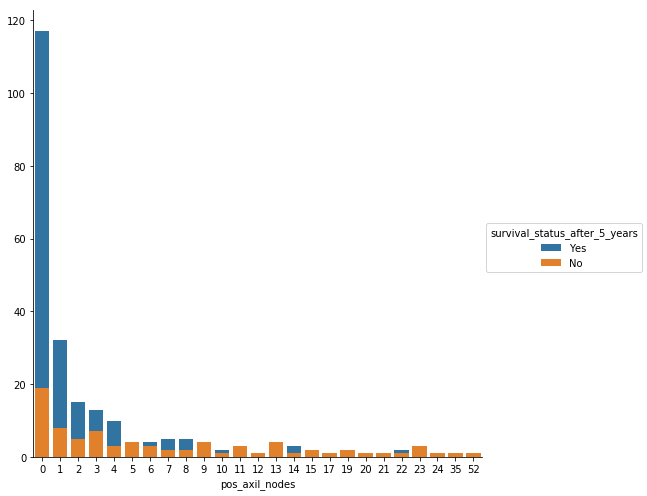

In [19]:
sns.FacetGrid(cancer_data,hue = "survival_status_after_5_years",size  =7).map(sns.countplot,'pos_axil_nodes').add_legend()

Patients with few axil nodes has better chance of surviving after 5 years